In [301]:
# Import necessary libraries
import numpy as np 
# Assign a value to a variable
np.set_printoptions(suppress=True)
# Import necessary libraries
import pandas as pd
# Import necessary libraries
import matplotlib.pyplot as plt
# Import necessary libraries
import seaborn as sns
# Import necessary libraries
import sklearn
# Import necessary libraries
import geopandas as gpd
# from shapely.geometry import Point

In [302]:
# #Read data
# Assign a value to a variable
wtrpmp = pd.read_csv('Water Pump Challenge.csv')

# #To make my train_test split easier later on: 
# Assign a value to a variable
wtrpmp.set_index('id', inplace=True)




In [303]:
# #Null values found in columns labeled False
# Display the first few rows of the dataset
wtrpmp.notnull().all().sort_values().head(10)

subvillage           False
scheme_management    False
public_meeting       False
scheme_name          False
wpt_name             False
permit               False
funder               False
installer            False
quantity_group        True
source_class          True
dtype: bool

In [304]:
# Assign a value to a variable
wtrpmp.scheme_management.value_counts(dropna=False)

scheme_management
VWC                 29462
WUG                  4161
NaN                  3103
Water authority      2522
WUA                  2312
Water Board          2175
Parastatal           1346
Private operator      862
Company               820
Other                 626
SWC                    75
Trust                  56
Name: count, dtype: int64

In [305]:
# #Scheme management involves who operates the well. Safe to change NaN to "unknown"
# Assign a value to a variable
wtrpmp.scheme_management.fillna(value="Unknown", inplace=True)

C:\Users\saite\AppData\Local\Temp\ipykernel_3792\1694283952.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  wtrpmp.scheme_management.fillna(value="Unknown", inplace=True)


In [306]:
# len(wtrpmp.subvillage.notnull())

47520

In [307]:
# Assign a value to a variable
wtrpmp.permit.value_counts(dropna=False)

permit
True     31028
False    14053
NaN       2439
Name: count, dtype: int64

In [308]:
# Assign a value to a variable
wtrpmp.public_meeting.value_counts(dropna=False)

public_meeting
True     40743
False     4088
NaN       2689
Name: count, dtype: int64

In [309]:
# #Recode NaN to Unknown to end up with True/False/Unknown as only categories
# Assign a value to a variable
wtrpmp.permit.fillna(value='Unknown', inplace=True)
# Assign a value to a variable
wtrpmp.public_meeting.fillna(value='Unknown', inplace=True)

C:\Users\saite\AppData\Local\Temp\ipykernel_3792\1456689947.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  wtrpmp.permit.fillna(value='Unknown', inplace=True)
C:\Users\saite\AppData\Local\Temp\ipykernel_3792\1456689947.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [310]:
# #Null values found in columns labeled False
# Display the first few rows of the dataset
wtrpmp.notnull().all().sort_values().head(10)

scheme_name              False
funder                   False
installer                False
wpt_name                 False
subvillage               False
construction_year         True
extraction_type           True
extraction_type_group     True
extraction_type_class     True
management                True
dtype: bool

In [311]:
# Display output
print("Number of unique subvillages: ", wtrpmp.subvillage.nunique())
# Display output
print("Number of unique funders: ", wtrpmp.funder.nunique())
# Display output
print("Number of unique installers: ", wtrpmp.installer.nunique())
# Display output
print("Number of unique scheme names: ", wtrpmp.scheme_name.nunique())

Number of unique subvillages:  17232
Number of unique funders:  1697
Number of unique installers:  1923
Number of unique scheme names:  2540


In [312]:
# #Get rid of a few columns: 
# Assign a value to a variable
wtrpmp.drop(columns=['wpt_name', 'subvillage', 'installer', 'scheme_name', 'funder'], inplace=True)

In [313]:
# #Sanity check: No more nulls? 
# wtrpmp.notnull().all().all()

True

In [314]:
# Display the first few rows of the dataset
wtrpmp.notnull().all().sort_values().head(10)

status_group_target      True
extraction_type          True
extraction_type_group    True
extraction_type_class    True
management               True
management_group         True
payment                  True
construction_year        True
payment_type             True
quality_group            True
dtype: bool

C:\Users\saite\AppData\Local\Temp\ipykernel_3792\3709300881.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=wtrpmp['longitude'], legend=True, shade=True, label='Longitude')


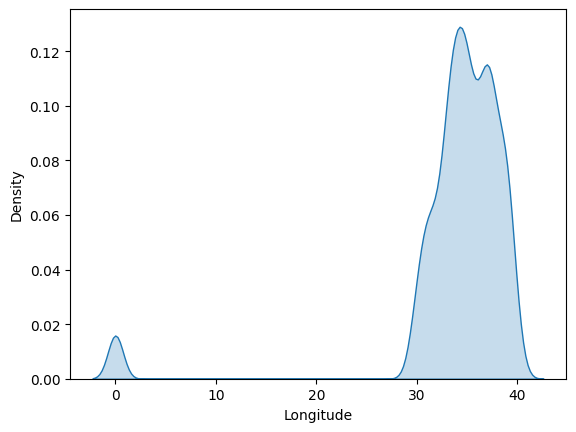

In [315]:
# #Let's check if lat/lon are okay
# #Longitude for Tanzania should be somewhere between 29 and 41
# Assign a value to a variable
sns.kdeplot(data=wtrpmp['longitude'], legend=True, shade=True, label='Longitude')
# plt.xlabel('Longitude')
# None

In [316]:
# #How many are wrong? 
# Assign a value to a variable
len(wtrpmp[wtrpmp.longitude == 0])

1433

In [317]:
# #Let's fix that: 
# Assign a value to a variable
wtrpmp.longitude.replace(0, np.nan, inplace=True)

# Assign a value to a variable
wtrpmp.longitude.fillna(wtrpmp.groupby(['region', 'district_code'])["longitude"].transform('mean'), inplace=True)
# Assign a value to a variable
wtrpmp.longitude.fillna(wtrpmp.groupby(['region'])["longitude"].transform('mean'), inplace=True)

C:\Users\saite\AppData\Local\Temp\ipykernel_3792\3883318999.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  wtrpmp.longitude.replace(0, np.nan, inplace=True)
C:\Users\saite\AppData\Local\Temp\ipykernel_3792\3883318999.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

C:\Users\saite\AppData\Local\Temp\ipykernel_3792\277488150.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=wtrpmp['latitude'], legend=True, shade=True, label='Latitude')


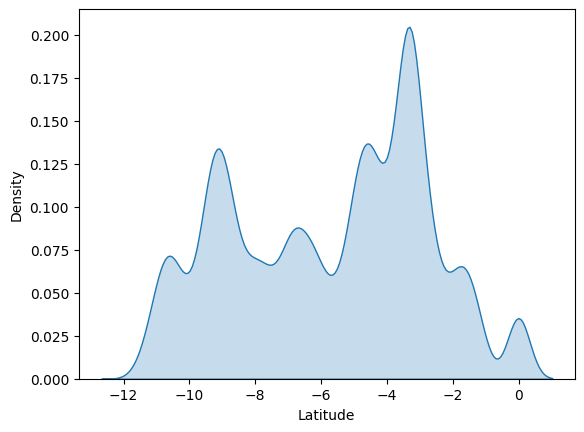

In [318]:
# #Same deal for latitude
# #Should be between -12 and 4 
# Assign a value to a variable
sns.kdeplot(data=wtrpmp['latitude'], legend=True, shade=True, label='Latitude')
# plt.xlabel('Latitude')
# None

In [319]:
# #Create geometry column and set up CRS
# Assign a value to a variable
wtrpmp['Geometry'] = [Point(xy) for xy in zip(wtrpmp.longitude, wtrpmp.latitude)]

# Assign a value to a variable
crs = {'init': 'epsg:4210'}

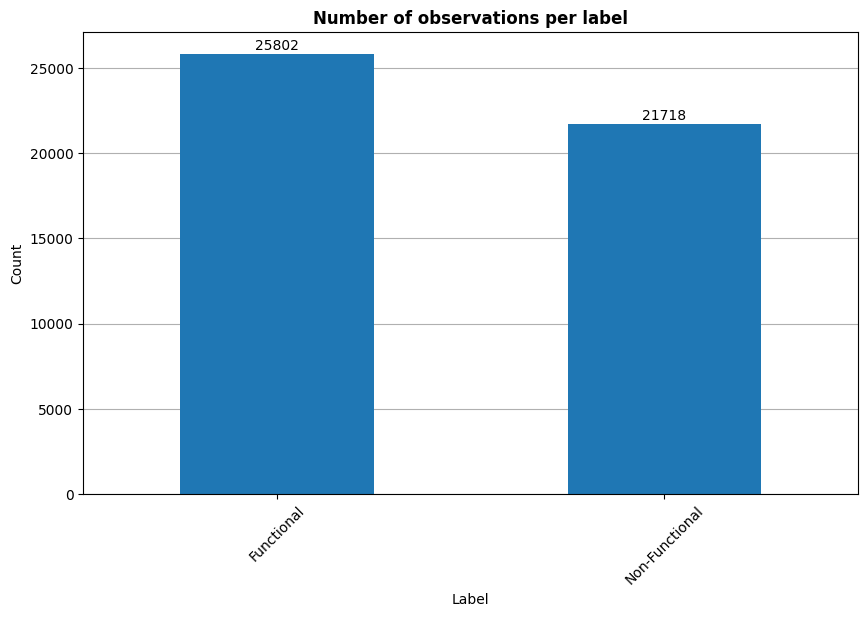

In [320]:
# #Instantiate
# Assign a value to a variable
fig, ax = plt.subplots(figsize=(10,6))
# Assign a value to a variable
wtrpmp['status_group_target'].value_counts().plot.bar(ax=ax, rot=45)

# #Prettify
# Assign a value to a variable
ax.set_title('Number of observations per label', fontweight='bold')
# ax.set_ylabel('Count')
# ax.set_xlabel('Label')
# ax.set_xticklabels(['Functional', 'Non-Functional'])
# ax.yaxis.grid()
# ax.set_axisbelow(True)

# #Annotate
# Assign a value to a variable
rects = ax.patches
# Loop through elements
for rect in rects:
# Assign a value to a variable
    x=rect.get_x() + (rect.get_width()/2)
# Assign a value to a variable
    y=rect.get_height() * 1.01
# Assign a value to a variable
    ax.text(x, y, rect.get_height(), ha='center')
    
# plt.savefig('obs_per_label.png')

C:\Users\saite\AppData\Local\Temp\ipykernel_3792\2846348575.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Functional', 'Non-Functional'])
C:\Users\saite\AppData\Local\Temp\ipykernel_3792\2846348575.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Functional', 'Non-Functional'])


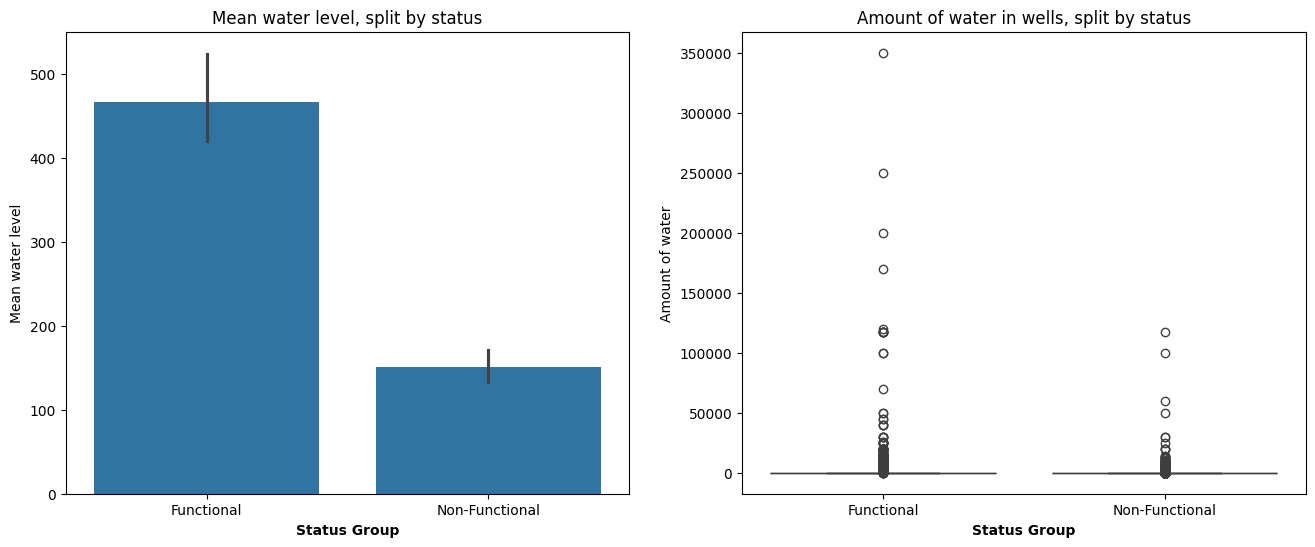

In [321]:
# #Instantiate
# Assign a value to a variable
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# #Barplot
# Assign a value to a variable
sns.barplot(data=wtrpmp, y='amount_tsh', x='status_group_target', 
# Assign a value to a variable
            order=['functional', 'non functional'], ax=axes[0])
# #Prettify
# axes[0].set_title('Mean water level, split by status')
# axes[0].set_ylabel('Mean water level')
# Assign a value to a variable
axes[0].set_xlabel('Status Group', fontweight='bold')
# axes[0].set_xticklabels(['Functional', 'Non-Functional'])

# #Boxplot
# Assign a value to a variable
sns.boxplot(data=wtrpmp, x='status_group_target', y='amount_tsh', order=['functional', 'non functional'],
# Assign a value to a variable
            ax=axes[1])
# #Prettify
# axes[1].set_title("Amount of water in wells, split by status")
# axes[1].set_ylabel("Amount of water")
# Assign a value to a variable
axes[1].set_xlabel("Status Group", fontweight='bold')
# axes[1].set_xticklabels(['Functional', 'Non-Functional'])

# plt.savefig('water_level_per_label.png')
# None

In [322]:

# #Note that the distribution looks really rather messed up
# Generate summary statistics
wtrpmp.groupby('status_group_target')['amount_tsh'].describe()

,count,mean,std,min,25%,50%,75%,max
status_group_target,,,,,,,,
functional,25802.0,466.533495,4146.507506,0.0,0.0,0.0,50.0,350000.0
non functional,21718.0,150.391537,1390.596059,0.0,0.0,0.0,0.0,117000.0


In [323]:
# #Empty or unregistered Wells
# Assign a value to a variable
print("Amount of empty or unregistered wells: ", len(wtrpmp[wtrpmp['amount_tsh'] == 0]))
# Assign a value to a variable
print("Amount of non-empty wells: ", len(wtrpmp[wtrpmp['amount_tsh'] != 0]))

Amount of empty or unregistered wells:  33331
Amount of non-empty wells:  14189


In [324]:
# #It seems highly likely that 0 was used as value for unmeasured water levels, along with those wells that actually
# #did have no water. That said, with such an overwhelming amount of zeroes, I am not going to use this column at all.

# #While we're at it, also using this field to remove the date the observation was recorded, since that's obviously irrelevant.
# Assign a value to a variable
wtrpmp.drop(columns=['amount_tsh', 'date_recorded'], inplace=True)

C:\Users\saite\AppData\Local\Temp\ipykernel_3792\387239627.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Functional', 'Non-Functional'])
C:\Users\saite\AppData\Local\Temp\ipykernel_3792\387239627.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Functional', 'Non-Functional'])


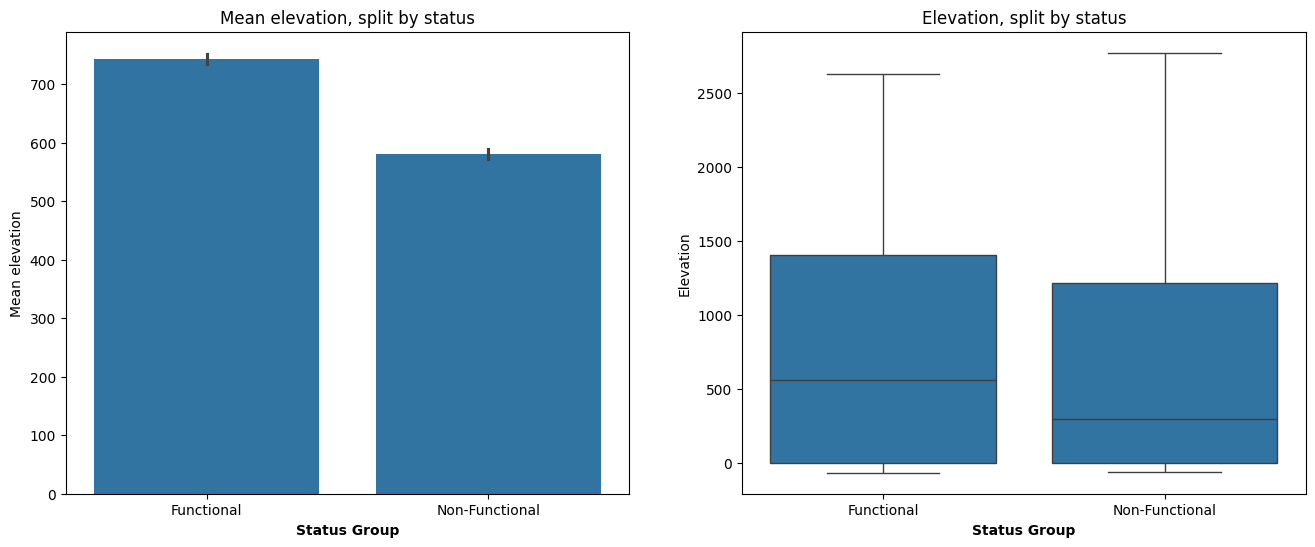

In [325]:
# #Instantiate
# Assign a value to a variable
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# #Barplot
# Assign a value to a variable
sns.barplot(data=wtrpmp, y='gps_height', x='status_group_target', 
# Assign a value to a variable
            order=['functional', 'non functional'], ax=axes[0])
# #Prettify
# axes[0].set_title('Mean elevation, split by status')
# axes[0].set_ylabel('Mean elevation')
# Assign a value to a variable
axes[0].set_xlabel('Status Group', fontweight='bold')
# axes[0].set_xticklabels(['Functional', 'Non-Functional'])

# #Boxplot
# Assign a value to a variable
sns.boxplot(data=wtrpmp, x='status_group_target', y='gps_height', order=['functional', 'non functional'],
# Assign a value to a variable
            ax=axes[1])
# #Prettify
# axes[1].set_title("Elevation, split by status")
# axes[1].set_ylabel("Elevation")
# Assign a value to a variable
axes[1].set_xlabel("Status Group", fontweight='bold')
# axes[1].set_xticklabels(['Functional', 'Non-Functional'])

# plt.savefig('elevation_per_label.png')

# None

In [326]:
# #Well elevation
# Assign a value to a variable
print("Amount of wells recorded with 0 elevation: ", len(wtrpmp[wtrpmp['gps_height'] == 0]))
# Assign a value to a variable
print("Amount of wells with recorded elevation: ", len(wtrpmp[wtrpmp['gps_height'] != 0]))

Amount of wells recorded with 0 elevation:  16275
Amount of wells with recorded elevation:  31245


In [327]:
# #Replace with nans to be able to use fillna
# #As seen on the maps above, coastal areas in the east might have zero values that are completely valid.
# #It's the three huge green spots that we need to deal with, not the coast near the indian ocean. 
# Assign a value to a variable
wtrpmp.gps_height = np.where(wtrpmp.longitude < 38.1, wtrpmp.gps_height.replace(0, np.nan), wtrpmp.gps_height)

# Display output
print("Amount of unregistered wells before imputation: ", wtrpmp.gps_height.isnull().sum())

Amount of unregistered wells before imputation:  15991


In [328]:
# Group dataset by specific column(s)
wtrpmp.gps_height.fillna(wtrpmp.groupby(['ward']).gps_height.transform('median').round(),
# Assign a value to a variable
                                    inplace=True)

# #Wells with unregistered construction year
# Display output
print("Amount of unregistered wells after ward imputation: ", wtrpmp.gps_height.isnull().sum())

Amount of unregistered wells after ward imputation:  15126


C:\Users\saite\AppData\Local\Temp\ipykernel_3792\2209040640.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  wtrpmp.gps_height.fillna(wtrpmp.groupby(['ward']).gps_height.transform('median').round(),


In [329]:
# Group dataset by specific column(s)
wtrpmp.gps_height.fillna(wtrpmp.groupby(['lga']).gps_height.transform('median').round(),
# Assign a value to a variable
                                    inplace=True)

# #Wells with unregistered construction year
# Display output
print("Amount of unregistered wells after lga imputation: ", wtrpmp.gps_height.isnull().sum())

Amount of unregistered wells after lga imputation:  7149


C:\Users\saite\AppData\Local\Temp\ipykernel_3792\1248652856.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  wtrpmp.gps_height.fillna(wtrpmp.groupby(['lga']).gps_height.transform('median').round(),


In [330]:
# Group dataset by specific column(s)
wtrpmp.gps_height.fillna(wtrpmp.groupby(['region']).gps_height.transform('median').round(),
# Assign a value to a variable
                                    inplace=True)

# #Wells with unregistered construction year
# Display output
print("Amount of unregistered wells after region imputation: ", wtrpmp.gps_height.isnull().sum())

Amount of unregistered wells after region imputation:  0


C:\Users\saite\AppData\Local\Temp\ipykernel_3792\1143209390.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  wtrpmp.gps_height.fillna(wtrpmp.groupby(['region']).gps_height.transform('median').round(),


In [331]:
# Assign a value to a variable
wtrpmp.drop(columns=[ 'num_private'], inplace=True)

In [332]:
# #Basin
# Assign a value to a variable
basin_pivot = wtrpmp.pivot_table(values='public_meeting', index='basin', columns='status_group_target', aggfunc='count')
# Assign a value to a variable
basin_pivot['total'] = basin_pivot['functional'] + basin_pivot['non functional']
# Loop through elements
for col in basin_pivot.columns: 
# Assign a value to a variable
    basin_pivot[col] = basin_pivot[col] / basin_pivot['total'] * 100
    
# #Region
# Assign a value to a variable
region_pivot = wtrpmp.pivot_table(values='public_meeting', index='region', columns='status_group_target', aggfunc='count')
# Assign a value to a variable
region_pivot['total'] = region_pivot['functional'] + region_pivot['non functional']
# Loop through elements
for col in region_pivot.columns: 
# Assign a value to a variable
    region_pivot[col] = region_pivot[col] / region_pivot['total'] * 100

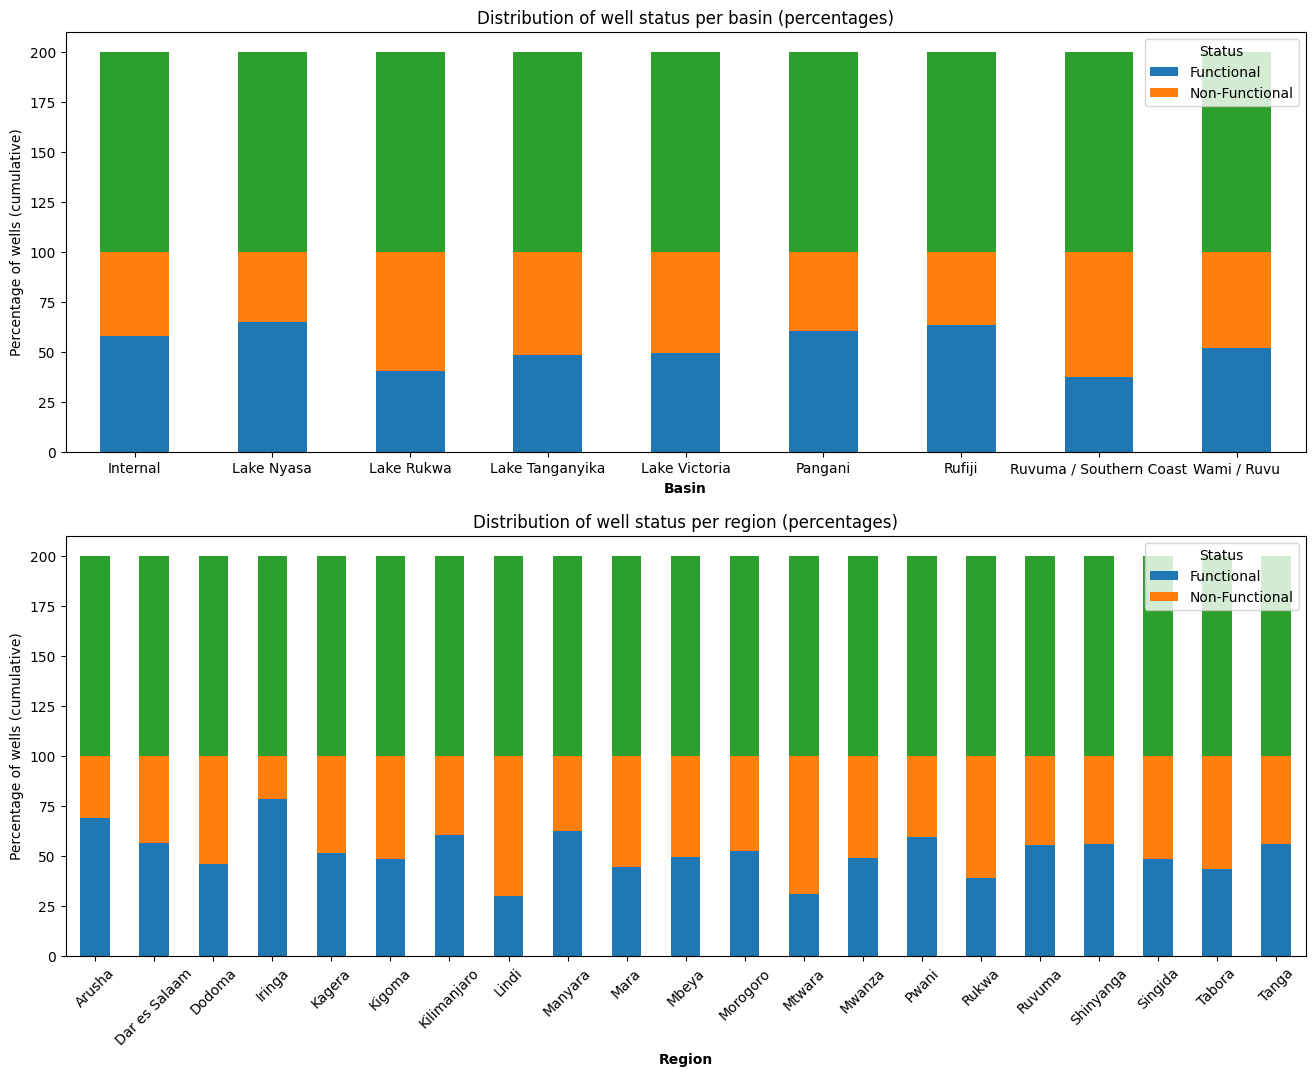

In [333]:
# #Instantiate
# Assign a value to a variable
fig, axes = plt.subplots(2, 1, figsize=(16,12))
# Assign a value to a variable
basin_pivot.iloc[:, :3].plot.bar(stacked=True, ax=axes[0], rot=360)
# Assign a value to a variable
region_pivot.iloc[:, :3].plot.bar(stacked=True, ax=axes[1], rot=45)

# #Prettify Basin
# axes[0].set_title('Distribution of well status per basin (percentages)')
# axes[0].set_ylabel('Percentage of wells (cumulative)')
# Assign a value to a variable
axes[0].set_xlabel('Basin', fontweight='bold')
# Assign a value to a variable
axes[0].legend(title='Status', labels=['Functional', 'Non-Functional'])


# #Prettify region
# axes[1].set_title('Distribution of well status per region (percentages)')
# axes[1].set_ylabel('Percentage of wells (cumulative)')
# Assign a value to a variable
axes[1].set_xlabel('Region', fontweight='bold')
# Assign a value to a variable
axes[1].legend(title='Status', labels=['Functional', 'Non-Functional'])

# plt.savefig('label_per_location.png')

# None

In [334]:
# #Check for typos
# wtrpmp.region.value_counts()

region
Iringa           4254
Shinyanga        3977
Mbeya            3659
Kilimanjaro      3466
Morogoro         3223
Arusha           2692
Kagera           2662
Mwanza           2475
Kigoma           2255
Pwani            2115
Ruvuma           2105
Tanga            2052
Dodoma           1755
Singida          1664
Mara             1590
Tabora           1578
Rukwa            1454
Mtwara           1374
Manyara          1266
Lindi            1250
Dar es Salaam     654
Name: count, dtype: int64

In [335]:
# #Note that region code doesn't match region, so we'll just encode region ourselves and get rid of this one.
# wtrpmp.region_code.value_counts()

region_code
11    4259
17    4000
12    3659
3     3466
5     3249
18    2669
2     2430
19    2429
16    2255
10    2105
4     2026
1     1755
13    1664
14    1596
20    1590
15    1454
6     1275
21    1266
80    1002
60     839
90     722
7      654
99     343
9      309
24     262
8      241
40       1
Name: count, dtype: int64

In [336]:
# #Continuous variable, so an ECDF might be helpful:
# Define a function
def ecdf(col): 
# Assign a value to a variable
    x=np.sort(col)
# Assign a value to a variable
    y=np.arange(1, len(x)+1) / len(x)
#     return x,y
# Assign a value to a variable
x_pop, y_pop = ecdf(wtrpmp.population)

C:\Users\saite\AppData\Local\Temp\ipykernel_3792\1638782084.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_yticklabels([0, 0, 20, 40, 60, 80, 100])
C:\Users\saite\AppData\Local\Temp\ipykernel_3792\1638782084.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Functional', 'Non-Functional'])


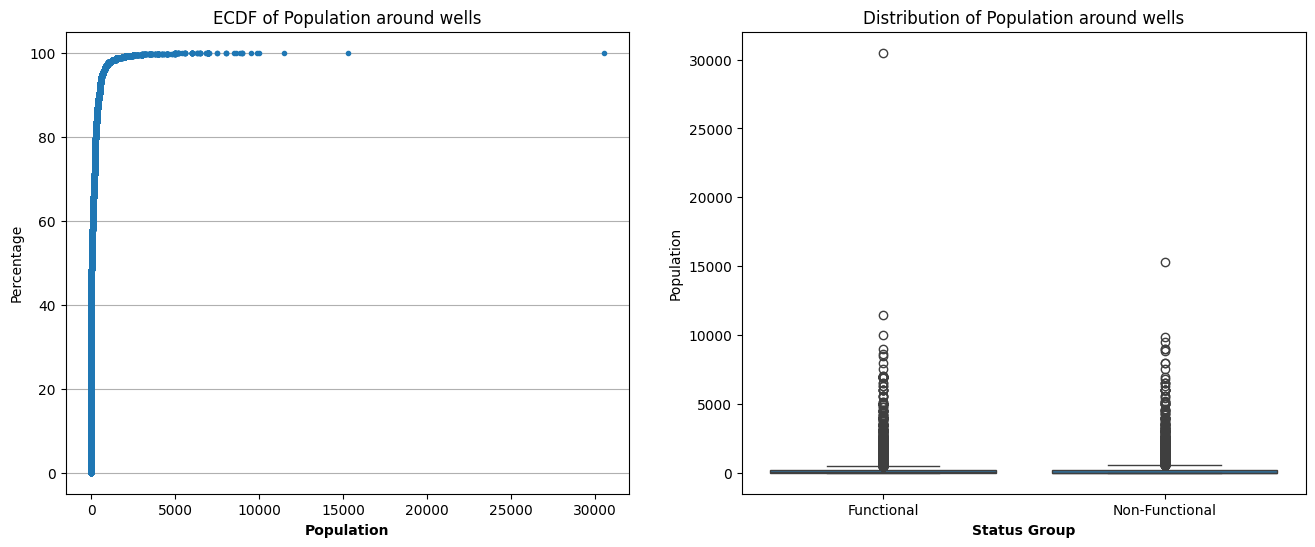

In [337]:
# #Instantiate
# Assign a value to a variable
fig, axes = plt.subplots(1, 2, figsize=(16,6))
# Assign a value to a variable
axes[0].plot(x_pop, y_pop, marker='.', linestyle='none')
# Assign a value to a variable
sns.boxplot(data=wtrpmp, x='status_group_target', y='population', order=['functional', 'non functional'],
# Assign a value to a variable
            ax=axes[1])
# #Prettify
# Assign a value to a variable
axes[0].set_xlabel('Population', fontweight='bold')
# axes[0].set_yticklabels([0, 0, 20, 40, 60, 80, 100])
# axes[0].set_ylabel('Percentage')
# axes[0].set_title('ECDF of Population around wells')
# axes[0].yaxis.grid()

# Assign a value to a variable
axes[1].set_xlabel('Status Group', fontweight='bold')
# axes[1].set_xticklabels(['Functional', 'Non-Functional'])
# axes[1].set_ylabel('Population')
# axes[1].set_title('Distribution of Population around wells')

# plt.savefig('population_distribution.png')

# None

In [338]:
# #Quantitative version
# Generate summary statistics
wtrpmp.groupby('status_group_target').population.describe()

,count,mean,std,min,25%,50%,75%,max
status_group_target,,,,,,,,
functional,25802.0,185.829858,508.008082,0.0,0.0,40.0,200.0,30500.0
non functional,21718.0,172.041717,427.041757,0.0,0.0,1.0,230.0,15300.0


In [339]:
# #Uninhabited wells or wells with unregistered population
# Assign a value to a variable
print("Amount of uninhabited or unregistered wells: ", len(wtrpmp[wtrpmp['population'] == 0]))
# Assign a value to a variable
print("Amount of inhabited or registered wells: ", len(wtrpmp[wtrpmp['population'] != 0]))

Amount of uninhabited or unregistered wells:  17048
Amount of inhabited or registered wells:  30472


In [340]:
# #Replace with nans to be able to use fillna
# Assign a value to a variable
wtrpmp.population.replace(0, np.nan, inplace=True)
# Display output
print("Amount of unregistered wells before any imputation: ", wtrpmp.population.isnull().sum())

Amount of unregistered wells before any imputation:  17048


C:\Users\saite\AppData\Local\Temp\ipykernel_3792\619039804.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  wtrpmp.population.replace(0, np.nan, inplace=True)


In [341]:
# Group dataset by specific column(s)
wtrpmp.population.fillna(wtrpmp.groupby(['ward', 'status_group_target']).population.transform('mean').round(),
# Assign a value to a variable
                                    inplace=True)

# #Wells with unregistered construction year
# Display output
print("Amount of unregistered wells after ward imputation: ", wtrpmp.population.isnull().sum())

Amount of unregistered wells after ward imputation:  15862


In [342]:
# Group dataset by specific column(s)
wtrpmp.population.fillna(wtrpmp.groupby(['lga', 'status_group_target']).population.transform('mean').round(),
# Assign a value to a variable
                                    inplace=True)

# #Wells with unregistered construction year
# Display output
print("Amount of unregistered wells after lga imputation: ", wtrpmp.population.isnull().sum())

Amount of unregistered wells after lga imputation:  8603


In [343]:
# Group dataset by specific column(s)
wtrpmp.population.fillna(wtrpmp.groupby(['region', 'status_group_target']).population.transform('mean').round(),
# Assign a value to a variable
                                    inplace=True)

# #Wells with unregistered construction year
# Display output
print("Amount of unregistered wells after region imputation: ", wtrpmp.population.isnull().sum())

Amount of unregistered wells after region imputation:  1296


In [344]:
# Group dataset by specific column(s)
wtrpmp.population.fillna(wtrpmp.groupby(['basin', 'status_group_target']).population.transform('mean').round(),
# Assign a value to a variable
                                    inplace=True)

# #Wells with unregistered construction year
# Display output
print("Amount of unregistered wells after basin imputation: ", wtrpmp.population.isnull().sum())

Amount of unregistered wells after basin imputation:  0


In [345]:
# #Back to ints
# Assign a value to a variable
wtrpmp.population = wtrpmp.population.astype(int)

In [346]:
# #Remove recorded_by, which only contains 1 value
# Assign a value to a variable
wtrpmp.drop(columns=['recorded_by'], inplace=True)

C:\Users\saite\AppData\Local\Temp\ipykernel_3792\1312320267.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Functional', 'Non-Functional'])


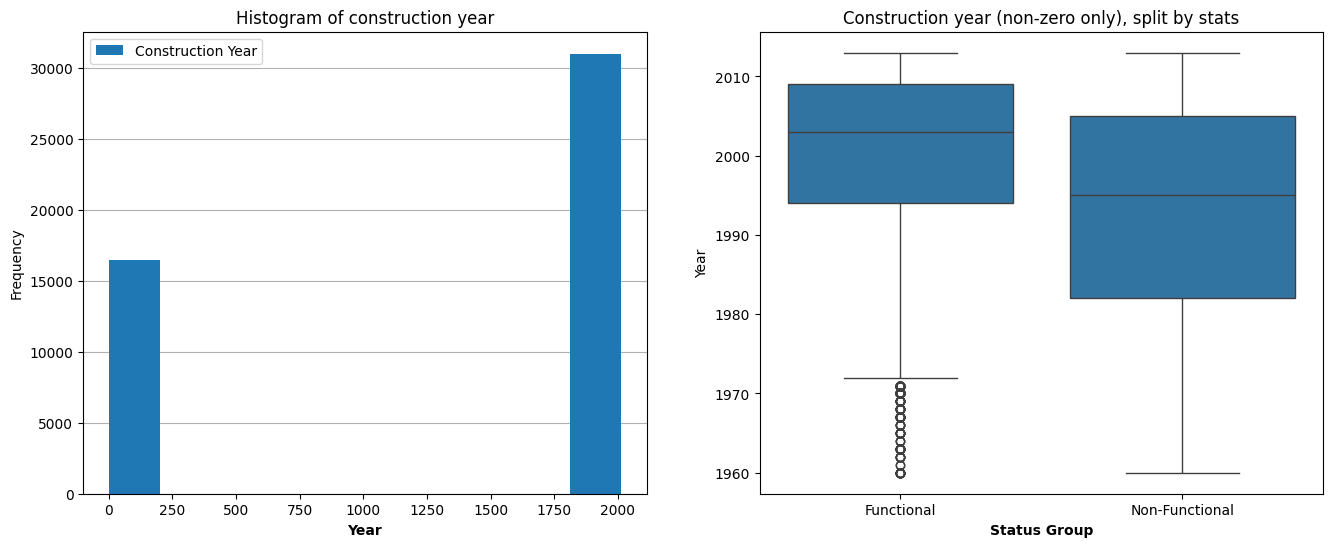

In [347]:
# #Instantiate
# Assign a value to a variable
fig, axes = plt.subplots(1, 2, figsize=(16,6))
# Assign a value to a variable
axes[0].hist(wtrpmp['construction_year'], label='Construction Year')
# Assign a value to a variable
sns.boxplot(data=wtrpmp[wtrpmp['construction_year'] != 0], x='status_group_target', y='construction_year',
# Assign a value to a variable
            order=['functional', 'non functional'])
# #Prettify
# axes[0].legend()
# Assign a value to a variable
axes[0].set_xlabel('Year', fontweight='bold')
# axes[0].set_ylabel('Frequency')
# axes[0].set_title('Histogram of construction year')
# axes[0].yaxis.grid()
# axes[0].set_axisbelow(True)

# #Prettify
# axes[1].set_title("Construction year (non-zero only), split by stats")
# axes[1].set_ylabel("Year")
# Assign a value to a variable
axes[1].set_xlabel("Status Group", fontweight='bold')
# axes[1].set_xticklabels(['Functional', 'Non-Functional'])

# plt.savefig('construction_year_pre_impute.png')
# None

In [348]:
# #Quantitative
# Assign a value to a variable
wtrpmp[wtrpmp['construction_year'] != 0].groupby('status_group_target').construction_year.describe()

,count,mean,std,min,25%,50%,75%,max
status_group_target,,,,,,,,
functional,17415.0,1999.905541,10.950659,1960.0,1994.0,2003.0,2009.0,2013.0
non functional,13602.0,1992.867887,13.187142,1960.0,1982.0,1995.0,2005.0,2013.0


In [349]:
# #Wells with unregistered construction year
# Assign a value to a variable
print("Amount of unregistered wells: ", len(wtrpmp[wtrpmp['construction_year'] == 0]))
# Assign a value to a variable
print("Amount of properly registered wells: ", len(wtrpmp[wtrpmp['construction_year'] != 0]))

Amount of unregistered wells:  16503
Amount of properly registered wells:  31017


In [350]:
# #Okay, from most to least specific:
# Display output
print("Number of unique wards: ", wtrpmp.ward.nunique())
# Display output
print("Number of unique districts: ", wtrpmp.lga.nunique())
# Display output
print("Number of unique regions: ", wtrpmp.region.nunique())
# Display output
print("Number of unique basins: ", wtrpmp.basin.nunique())

Number of unique wards:  2076
Number of unique districts:  125
Number of unique regions:  21
Number of unique basins:  9


In [351]:
# #Replace with nans to be able to use fillna
# Assign a value to a variable
wtrpmp.construction_year.replace(0, np.nan, inplace=True)

C:\Users\saite\AppData\Local\Temp\ipykernel_3792\1949880692.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  wtrpmp.construction_year.replace(0, np.nan, inplace=True)


In [352]:
# Group dataset by specific column(s)
wtrpmp.construction_year.fillna(wtrpmp.groupby(['ward', 'status_group_target']).construction_year.transform('median').round(),
# Assign a value to a variable
                                    inplace=True)

# #Wells with unregistered construction year
# Display output
print("Amount of unregistered wells after ward imputation: ", wtrpmp.construction_year.isnull().sum())

Amount of unregistered wells after ward imputation:  15106


In [353]:
# Group dataset by specific column(s)
wtrpmp.construction_year.fillna(wtrpmp.groupby(['lga', 'status_group_target']).construction_year.transform('median').round(),
# Assign a value to a variable
                                    inplace=True)

# #Wells with unregistered construction year
# Display output
print("Amount of unregistered wells after lga imputation: ", wtrpmp.construction_year.isnull().sum())

Amount of unregistered wells after lga imputation:  7970


In [354]:
# Group dataset by specific column(s)
wtrpmp.construction_year.fillna(wtrpmp.groupby(['region', 'status_group_target']).construction_year.transform('median').round(),
# Assign a value to a variable
                                    inplace=True)

# #Wells with unregistered construction year
# Display output
print("Amount of unregistered wells after region imputation: ", wtrpmp.construction_year.isnull().sum())

Amount of unregistered wells after region imputation:  1296


In [355]:
# Group dataset by specific column(s)
wtrpmp.construction_year.fillna(wtrpmp.groupby(['basin', 'status_group_target']).construction_year.transform('median').round(),
# Assign a value to a variable
                                    inplace=True)

# #Wells with unregistered construction year
# Display output
print("Amount of unregistered wells after basin imputation: ", wtrpmp.construction_year.isnull().sum())

Amount of unregistered wells after basin imputation:  0


In [356]:
# #Back to ints
# Assign a value to a variable
wtrpmp.construction_year = wtrpmp.construction_year.astype(int)

C:\Users\saite\AppData\Local\Temp\ipykernel_3792\3634128203.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Functional', 'Non-Functional'])


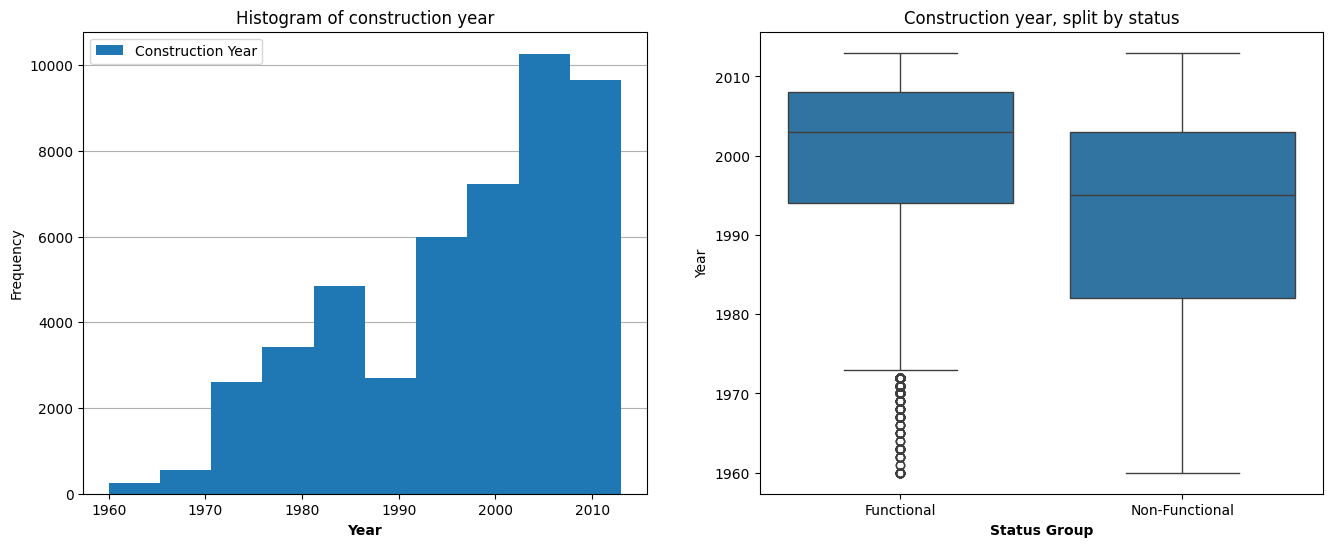

In [357]:
# #Instantiate
# Assign a value to a variable
fig, axes = plt.subplots(1, 2, figsize=(16,6))
# Assign a value to a variable
axes[0].hist(wtrpmp['construction_year'], label='Construction Year')
# Assign a value to a variable
sns.boxplot(data=wtrpmp, x='status_group_target', y='construction_year',
# Assign a value to a variable
            order=['functional', 'non functional'])
# #Prettify
# axes[0].legend()
# Assign a value to a variable
axes[0].set_xlabel('Year', fontweight='bold')
# axes[0].set_ylabel('Frequency')
# axes[0].set_title('Histogram of construction year')
# axes[0].yaxis.grid()
# axes[0].set_axisbelow(True)

# #Prettify
# axes[1].set_title("Construction year, split by status")
# axes[1].set_ylabel("Year")
# Assign a value to a variable
axes[1].set_xlabel("Status Group", fontweight='bold')
# axes[1].set_xticklabels(['Functional', 'Non-Functional'])

# plt.savefig('construction_year_post_impute.png')

# None

In [358]:
# #Quantitative
# Generate summary statistics
wtrpmp.groupby('status_group_target').construction_year.describe()

,count,mean,std,min,25%,50%,75%,max
status_group_target,,,,,,,,
functional,25802.0,1999.715410,10.573364,1960.0,1994.0,2003.0,2008.0,2013.0
non functional,21718.0,1992.503453,12.385151,1960.0,1982.0,1995.0,2003.0,2013.0


In [359]:
# #Now that we're done imputing, we can drop the non-region location columns. 
# #Note that I specified earlier that region would be the location column to keep as feature. I just used the rest for imputation.
# Assign a value to a variable
wtrpmp.drop(columns=['region_code', 'district_code', 'ward'], inplace=True)

In [360]:
# Assign a value to a variable
featurelist = ['longitude', 'latitude', 'gps_height', 'region', 'basin', 'lga', 'public_meeting', 'scheme_management', 'permit', 'construction_year', 'population']

In [361]:
# #Exctraction
# Display output
print("Type: ", wtrpmp.extraction_type.nunique())
# Display output
print("Type group: ", wtrpmp.extraction_type_group.nunique())
# Display output
print("Type class: ", wtrpmp.extraction_type_class.nunique())

Type:  18
Type group:  13
Type class:  7


In [362]:
# featurelist.append('extraction_type')

In [363]:
# #Management
# Display output
print("Management: ", wtrpmp.management.nunique())
# Display output
print("Management Group: ", wtrpmp.management_group.nunique())

Management:  12
Management Group:  5


In [364]:
# featurelist.append('management')

In [365]:
# #Payment
# Display output
print("Payment: ", wtrpmp.payment.nunique())
# Display output
print("Payment Type: ", wtrpmp.payment_type.nunique())

Payment:  7
Payment Type:  7


In [366]:
# #What's going on?
# wtrpmp.payment.value_counts()

payment
never pay                20318
pay per bucket            7223
pay monthly               6574
unknown                   6521
pay when scheme fails     3154
pay annually              2886
other                      844
Name: count, dtype: int64

In [367]:
# #Ah, they're completely identical
# wtrpmp.payment_type.value_counts()

payment_type
never pay     20318
per bucket     7223
monthly        6574
unknown        6521
on failure     3154
annually       2886
other           844
Name: count, dtype: int64

In [368]:
# #I'll go with payment_type cause it's formatted a little nicer
# featurelist.append('payment_type')

In [369]:
# #Water quality
# Display output
print("Quality: ", wtrpmp.water_quality.nunique())
# Display output
print("Quality group: ", wtrpmp.quality_group.nunique())

Quality:  8
Quality group:  6


In [370]:
# featurelist.append('water_quality')

In [371]:
# #Water quantity
# Display output
print("Quantity: ", wtrpmp.quantity.nunique())
# Display output
print("Quantity group: ", wtrpmp.quantity_group.nunique())

Quantity:  5
Quantity group:  5


In [372]:
# #What's going on?
# wtrpmp.quantity.value_counts()

quantity
enough          26538
insufficient    12104
dry              5024
seasonal         3225
unknown           629
Name: count, dtype: int64

In [373]:
# #100% identical
# wtrpmp.quantity_group.value_counts()

quantity_group
enough          26538
insufficient    12104
dry              5024
seasonal         3225
unknown           629
Name: count, dtype: int64

In [374]:
# featurelist.append('quantity')

In [375]:
# #Source
# Display output
print("Source: ", wtrpmp.source.nunique())
# Display output
print("Type: ", wtrpmp.source_type.nunique())
# Display output
print("Class: ", wtrpmp.source_class.nunique())

Source:  10
Type:  7
Class:  3


In [376]:
# featurelist.append('source')

In [377]:
# #Waterpoint type
# Display output
print("Type: ", wtrpmp.waterpoint_type.nunique())
# Display output
print("Group: ", wtrpmp.waterpoint_type_group.nunique())

Type:  7
Group:  6


In [378]:
# featurelist.append('waterpoint_type')

In [379]:
# #Let's not forget status group itself
# featurelist.append('status_group_target')

In [380]:
# #What did we end up with?
# featurelist

['longitude',
 'latitude',
 'gps_height',
 'region',
 'basin',
 'lga',
 'public_meeting',
 'scheme_management',
 'permit',
 'construction_year',
 'population',
 'extraction_type',
 'management',
 'payment_type',
 'water_quality',
 'quantity',
 'source',
 'waterpoint_type',
 'status_group_target']

In [381]:
# #Subset
# Assign a value to a variable
wtrpmp = wtrpmp[featurelist]

In [383]:
# #Store for ML
# wtrpmp.to_csv('edited_wtrpmp.csv')